In [47]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
from math import sqrt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import MultiTaskLasso, Lasso
from sklearn.linear_model import BayesianRidge, LinearRegression
from tpot import TPOTRegressor
import h2o
from h2o.automl import H2OAutoML
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
%matplotlib inline
pd.options.display.max_columns = 45
pd.options.display.max_rows = 70

In [3]:

data = pd.read_csv("datapart2/historical_data1_Q12005.txt",sep="|",header=None)
data.columns = ["CREDIT SCORE","FIRST PAYMENT DATE","FIRST TIME HOMEBUYER FLAG","MATURITY DATE","METROPOLITAN STATISTICAL AREA",
               "MORTGAGE INSURANCE PERCENTAGE","NUMBER OF UNITS","OCCUPANCY STATUS","ORIGINAL COMBINED LOAN-TO-VALU","ORIGINAL DEBT-TO-INCOME (DTI) RATIO",
               "ORIGINAL UPB","ORIGINAL LOAN-TO-VALUE","ORIGINAL INTEREST RATE","CHANNE","PREPAYMENT PENALTY MORTGAGE FLAG",
               "PRODUCT TYPE","PROPERTY STATE","PROPERTY TYPE","POSTAL CODE","LOAN SEQUENCE NUMBER","LOAN PURPOSE",
               "ORIGINAL LOAN TERM","NUMBER OF BORROWERS","SELLER NAME","SERVICER NAME","SUPER CONFORMING FLAG"
                #,"Pre-HARP LOAN SEQUENCE NUMBER"
                ]
data.head()


,CREDIT SCORE,FIRST PAYMENT DATE,FIRST TIME HOMEBUYER FLAG,MATURITY DATE,METROPOLITAN STATISTICAL AREA,MORTGAGE INSURANCE PERCENTAGE,NUMBER OF UNITS,OCCUPANCY STATUS,ORIGINAL COMBINED LOAN-TO-VALU,ORIGINAL DEBT-TO-INCOME (DTI) RATIO,ORIGINAL UPB,ORIGINAL LOAN-TO-VALUE,ORIGINAL INTEREST RATE,CHANNE,PREPAYMENT PENALTY MORTGAGE FLAG,PRODUCT TYPE,PROPERTY STATE,PROPERTY TYPE,POSTAL CODE,LOAN SEQUENCE NUMBER,LOAN PURPOSE,ORIGINAL LOAN TERM,NUMBER OF BORROWERS,SELLER NAME,SERVICER NAME,SUPER CONFORMING FLAG
0,699,200505,N,203504,39300.0,0,1,P,56,42,190000,56,5.625,R,N,FRM,RI,SF,2800.0,F105Q1000001,C,360,2,Other sellers,USBANKNA,NaN
1,691,200504,N,203503,36420.0,25,1,P,90,36,90000,90,5.750,R,N,FRM,OK,SF,73000.0,F105Q1000002,N,360,1,Other sellers,Other servicers,NaN
2,713,200503,N,203502,28740.0,0,1,P,72,45,357000,72,6.000,R,N,FRM,NY,SF,12500.0,F105Q1000003,P,360,2,Other sellers,Other servicers,NaN
3,719,200505,N,203504,NaN,0,1,S,85,47,195000,68,5.750,R,N,FRM,MO,CO,65000.0,F105Q1000004,P,360,2,Other sellers,USBANKNA,NaN
4,656,200503,N,203502,40340.0,0,1,P,68,30,253000,68,5.625,R,N,FRM,MN,SF,55900.0,F105Q1000005,C,360,2,Other sellers,Other servicers,NaN


In [4]:
data.shape

(351634, 26)

In [5]:
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
#missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count
0,CREDIT SCORE,0
1,FIRST PAYMENT DATE,0
2,FIRST TIME HOMEBUYER FLAG,0
3,MATURITY DATE,0
4,METROPOLITAN STATISTICAL AREA,54684
5,MORTGAGE INSURANCE PERCENTAGE,0
6,NUMBER OF UNITS,0
7,OCCUPANCY STATUS,0
8,ORIGINAL COMBINED LOAN-TO-VALU,0
9,ORIGINAL DEBT-TO-INCOME (DTI) RATIO,0


In [4]:
data['POSTAL CODE'].fillna(85200.0,inplace=True)
data['PREPAYMENT PENALTY MORTGAGE FLAG'].fillna('N',inplace=True)
data['METROPOLITAN STATISTICAL AREA'].fillna(16974.0,inplace=True)

In [5]:
data.drop(['SUPER CONFORMING FLAG'],axis=1,inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351634 entries, 0 to 351633
Data columns (total 25 columns):
CREDIT SCORE                           351634 non-null int64
FIRST PAYMENT DATE                     351634 non-null int64
FIRST TIME HOMEBUYER FLAG              351634 non-null object
MATURITY DATE                          351634 non-null int64
METROPOLITAN STATISTICAL AREA          351634 non-null float64
MORTGAGE INSURANCE PERCENTAGE          351634 non-null int64
NUMBER OF UNITS                        351634 non-null int64
OCCUPANCY STATUS                       351634 non-null object
ORIGINAL COMBINED LOAN-TO-VALU         351634 non-null int64
ORIGINAL DEBT-TO-INCOME (DTI) RATIO    351634 non-null int64
ORIGINAL UPB                           351634 non-null int64
ORIGINAL LOAN-TO-VALUE                 351634 non-null int64
ORIGINAL INTEREST RATE                 351634 non-null float64
CHANNE                                 351634 non-null object
PREPAYMENT PENALTY MORTGAGE 

In [6]:
data['CREDIT SCORE'].replace(to_replace=9999, value=np.nan, inplace=True)
data['CREDIT SCORE'].fillna((data['CREDIT SCORE'].mean()), inplace=True)
data['FIRST TIME HOMEBUYER FLAG'].replace(to_replace='9', value=np.nan, inplace=True)
data['FIRST TIME HOMEBUYER FLAG'].fillna('N', inplace=True)
data['Maturity_year'] =  [int(str(d)[:4]) for d in data['MATURITY DATE']]
del data['MATURITY DATE']
data['MORTGAGE INSURANCE PERCENTAGE'].replace(to_replace=999,value=0,inplace=True)
data['NUMBER OF UNITS'].replace(to_replace=99,value=1,inplace=True)
data['ORIGINAL COMBINED LOAN-TO-VALU'].replace(to_replace=999,value=80,inplace=True)



data['ORIGINAL DEBT-TO-INCOME (DTI) RATIO'].replace(to_replace=999,value=float('nan'),inplace=True)
data['ORIGINAL DEBT-TO-INCOME (DTI) RATIO'].fillna(data['ORIGINAL DEBT-TO-INCOME (DTI) RATIO'].mean(),inplace=True)
data['ORIGINAL LOAN-TO-VALUE'].replace(to_replace=999,value=float('nan'),inplace=True)
data['ORIGINAL LOAN-TO-VALUE'].fillna(data['ORIGINAL LOAN-TO-VALUE'].mean(),inplace=True)
data.drop('PRODUCT TYPE',axis=1,inplace=True)
data.drop('LOAN SEQUENCE NUMBER',axis=1,inplace=True)
data['PROPERTY TYPE'].replace(to_replace=99,value='SF',inplace=True)
data['LOAN PURPOSE'].replace(to_replace=9,value='C',inplace=True)
data['NUMBER OF BORROWERS'].replace(to_replace=99,value=2,inplace=True)


In [10]:
data.head()

,CREDIT SCORE,FIRST PAYMENT DATE,FIRST TIME HOMEBUYER FLAG,METROPOLITAN STATISTICAL AREA,MORTGAGE INSURANCE PERCENTAGE,NUMBER OF UNITS,OCCUPANCY STATUS,ORIGINAL COMBINED LOAN-TO-VALU,ORIGINAL DEBT-TO-INCOME (DTI) RATIO,ORIGINAL UPB,ORIGINAL LOAN-TO-VALUE,ORIGINAL INTEREST RATE,CHANNE,PREPAYMENT PENALTY MORTGAGE FLAG,PROPERTY STATE,PROPERTY TYPE,POSTAL CODE,LOAN PURPOSE,ORIGINAL LOAN TERM,NUMBER OF BORROWERS,SELLER NAME,SERVICER NAME,Maturity_year
0,699.0,200505,N,39300.0,0,1,P,56,42.0,190000,56.0,5.625,R,N,RI,SF,2800.0,C,360,2,Other sellers,USBANKNA,2035
1,691.0,200504,N,36420.0,25,1,P,90,36.0,90000,90.0,5.750,R,N,OK,SF,73000.0,N,360,1,Other sellers,Other servicers,2035
2,713.0,200503,N,28740.0,0,1,P,72,45.0,357000,72.0,6.000,R,N,NY,SF,12500.0,P,360,2,Other sellers,Other servicers,2035
3,719.0,200505,N,16974.0,0,1,S,85,47.0,195000,68.0,5.750,R,N,MO,CO,65000.0,P,360,2,Other sellers,USBANKNA,2035
4,656.0,200503,N,40340.0,0,1,P,68,30.0,253000,68.0,5.625,R,N,MN,SF,55900.0,C,360,2,Other sellers,Other servicers,2035


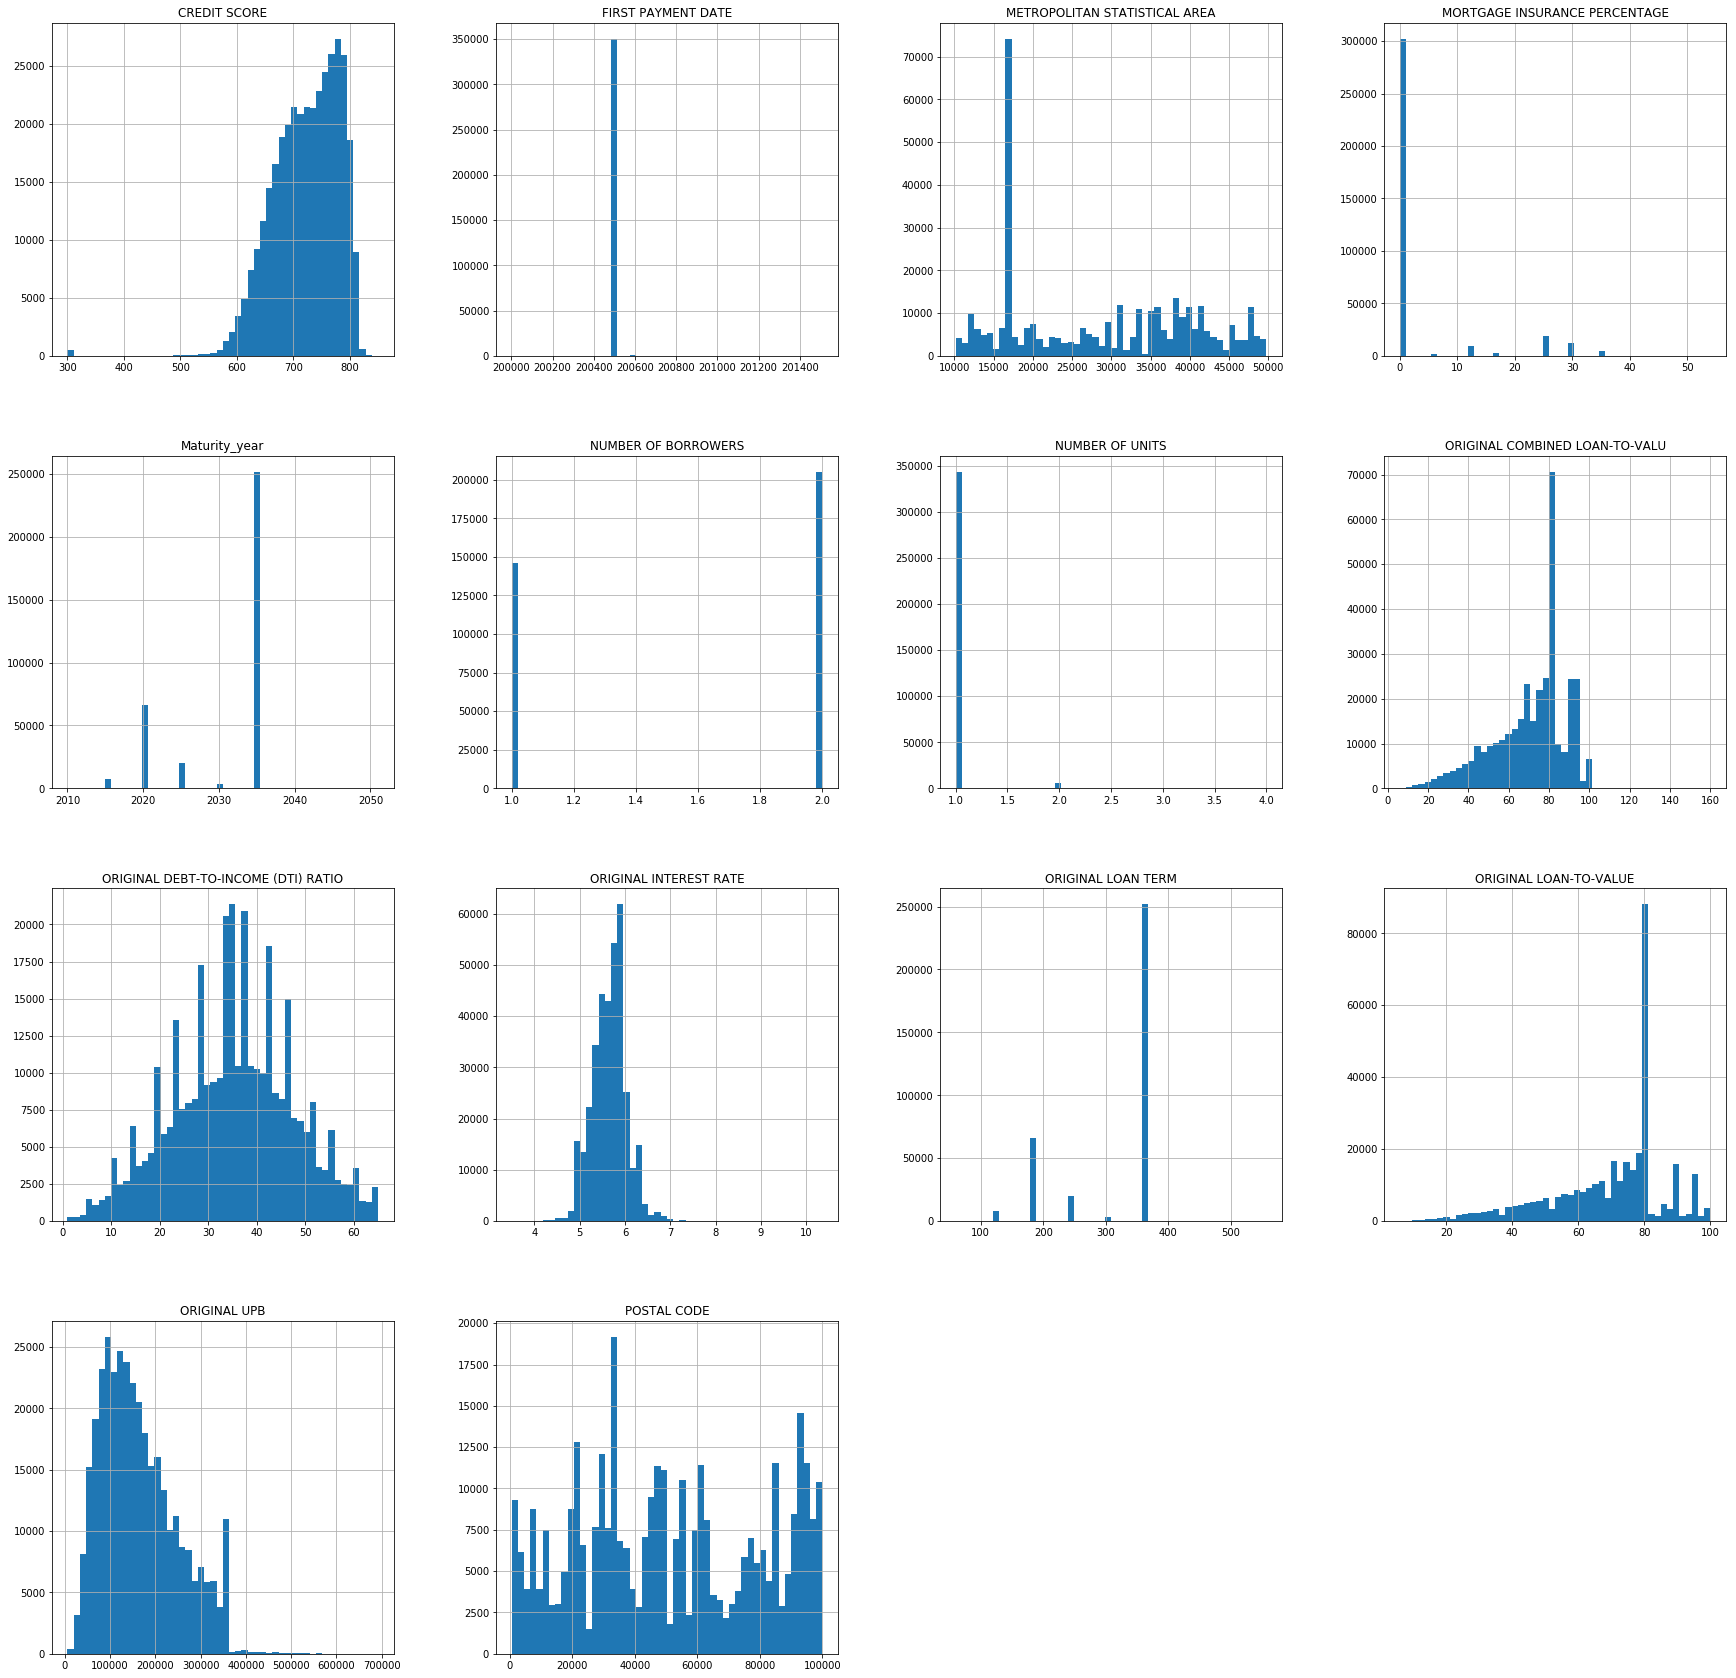

In [11]:
data.hist(bins=50,figsize=(30,30))
plt.show()

In [7]:
del data['FIRST PAYMENT DATE']


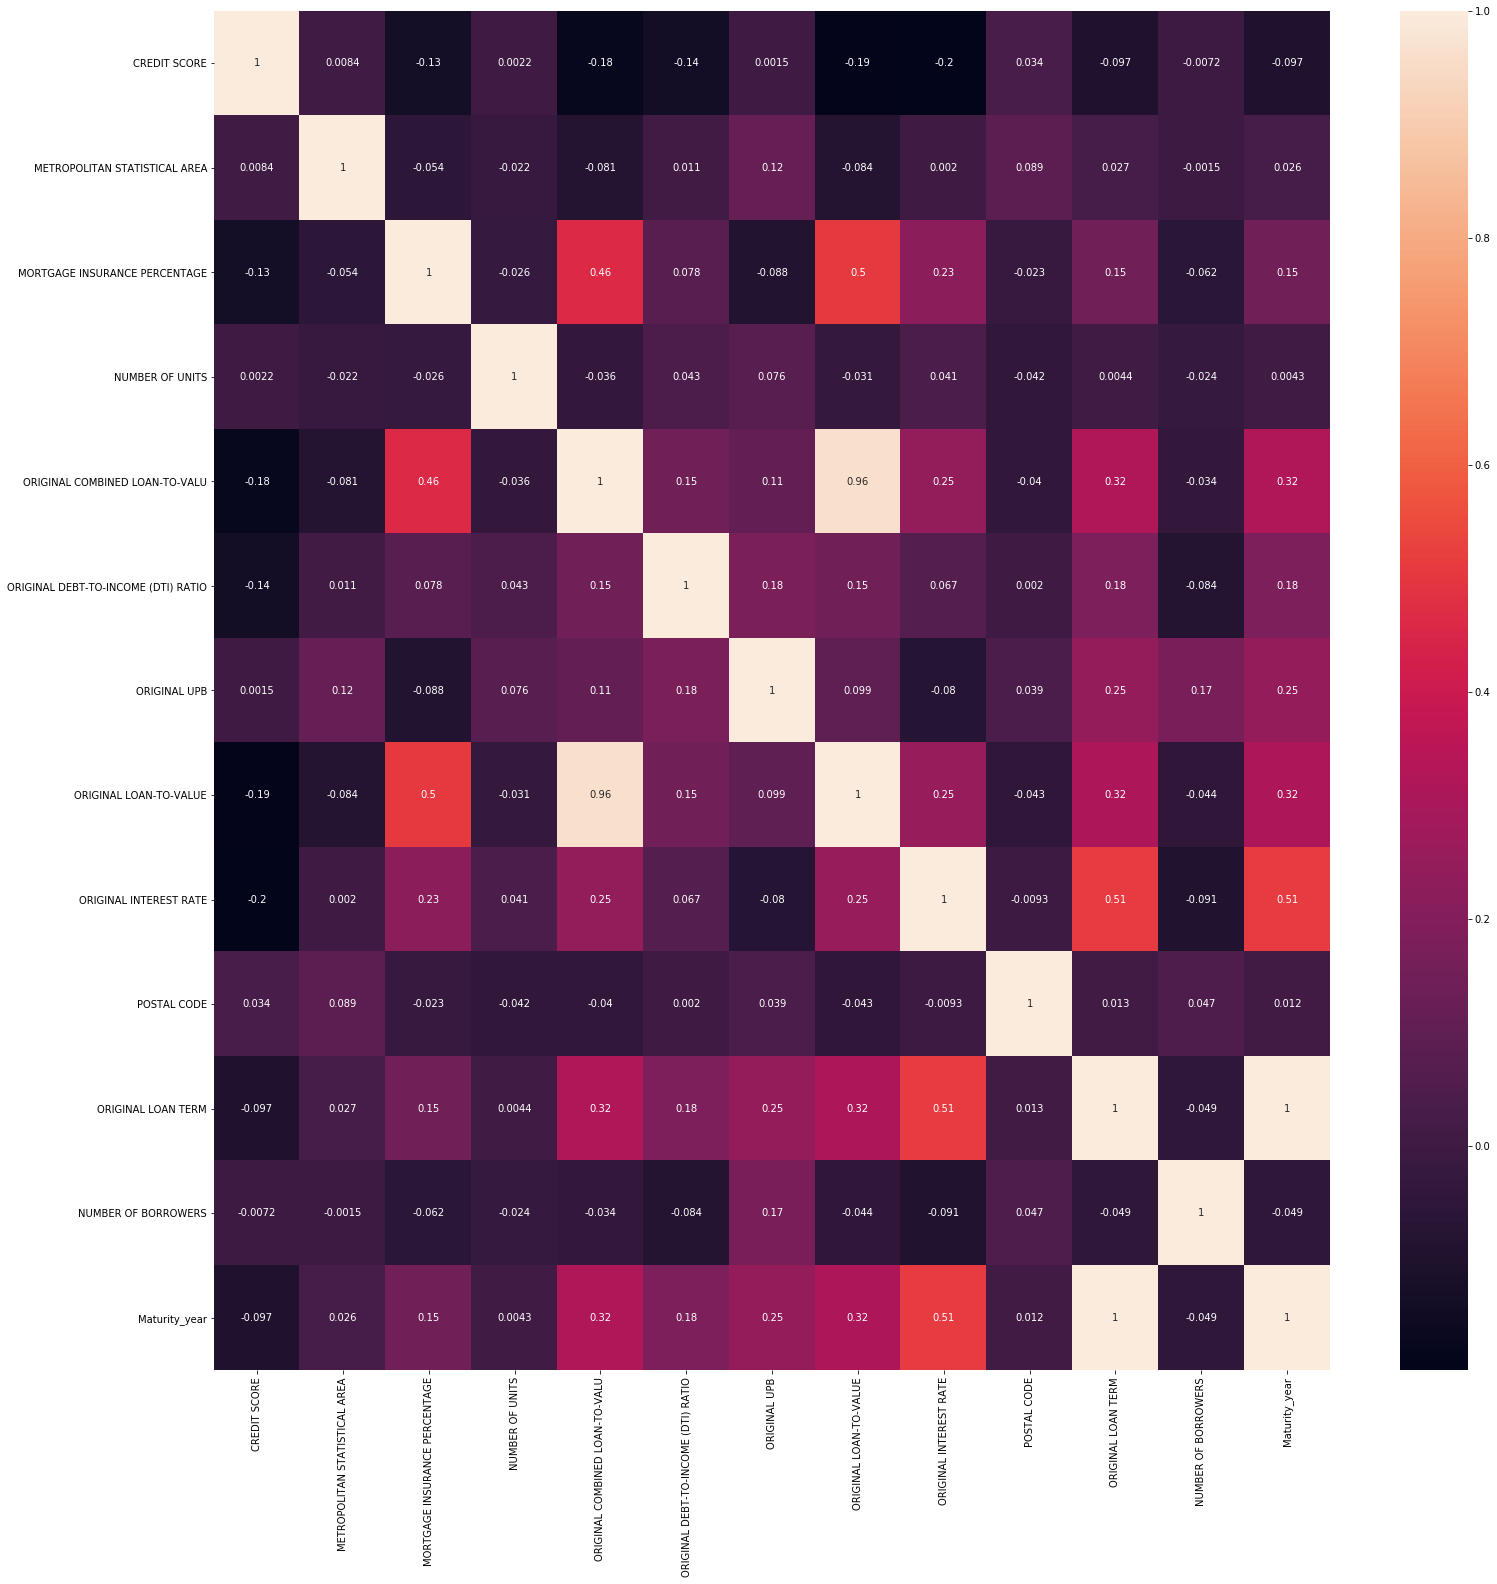

In [13]:
heat_map = data.corr()
plt.figure(figsize=(25,25))
sns.heatmap(heat_map,annot=True,vmax=1)
plt.show()

In [8]:
data.drop('ORIGINAL LOAN-TO-VALUE',axis=1,inplace=True)
data.drop('Maturity_year',axis=1,inplace=True)

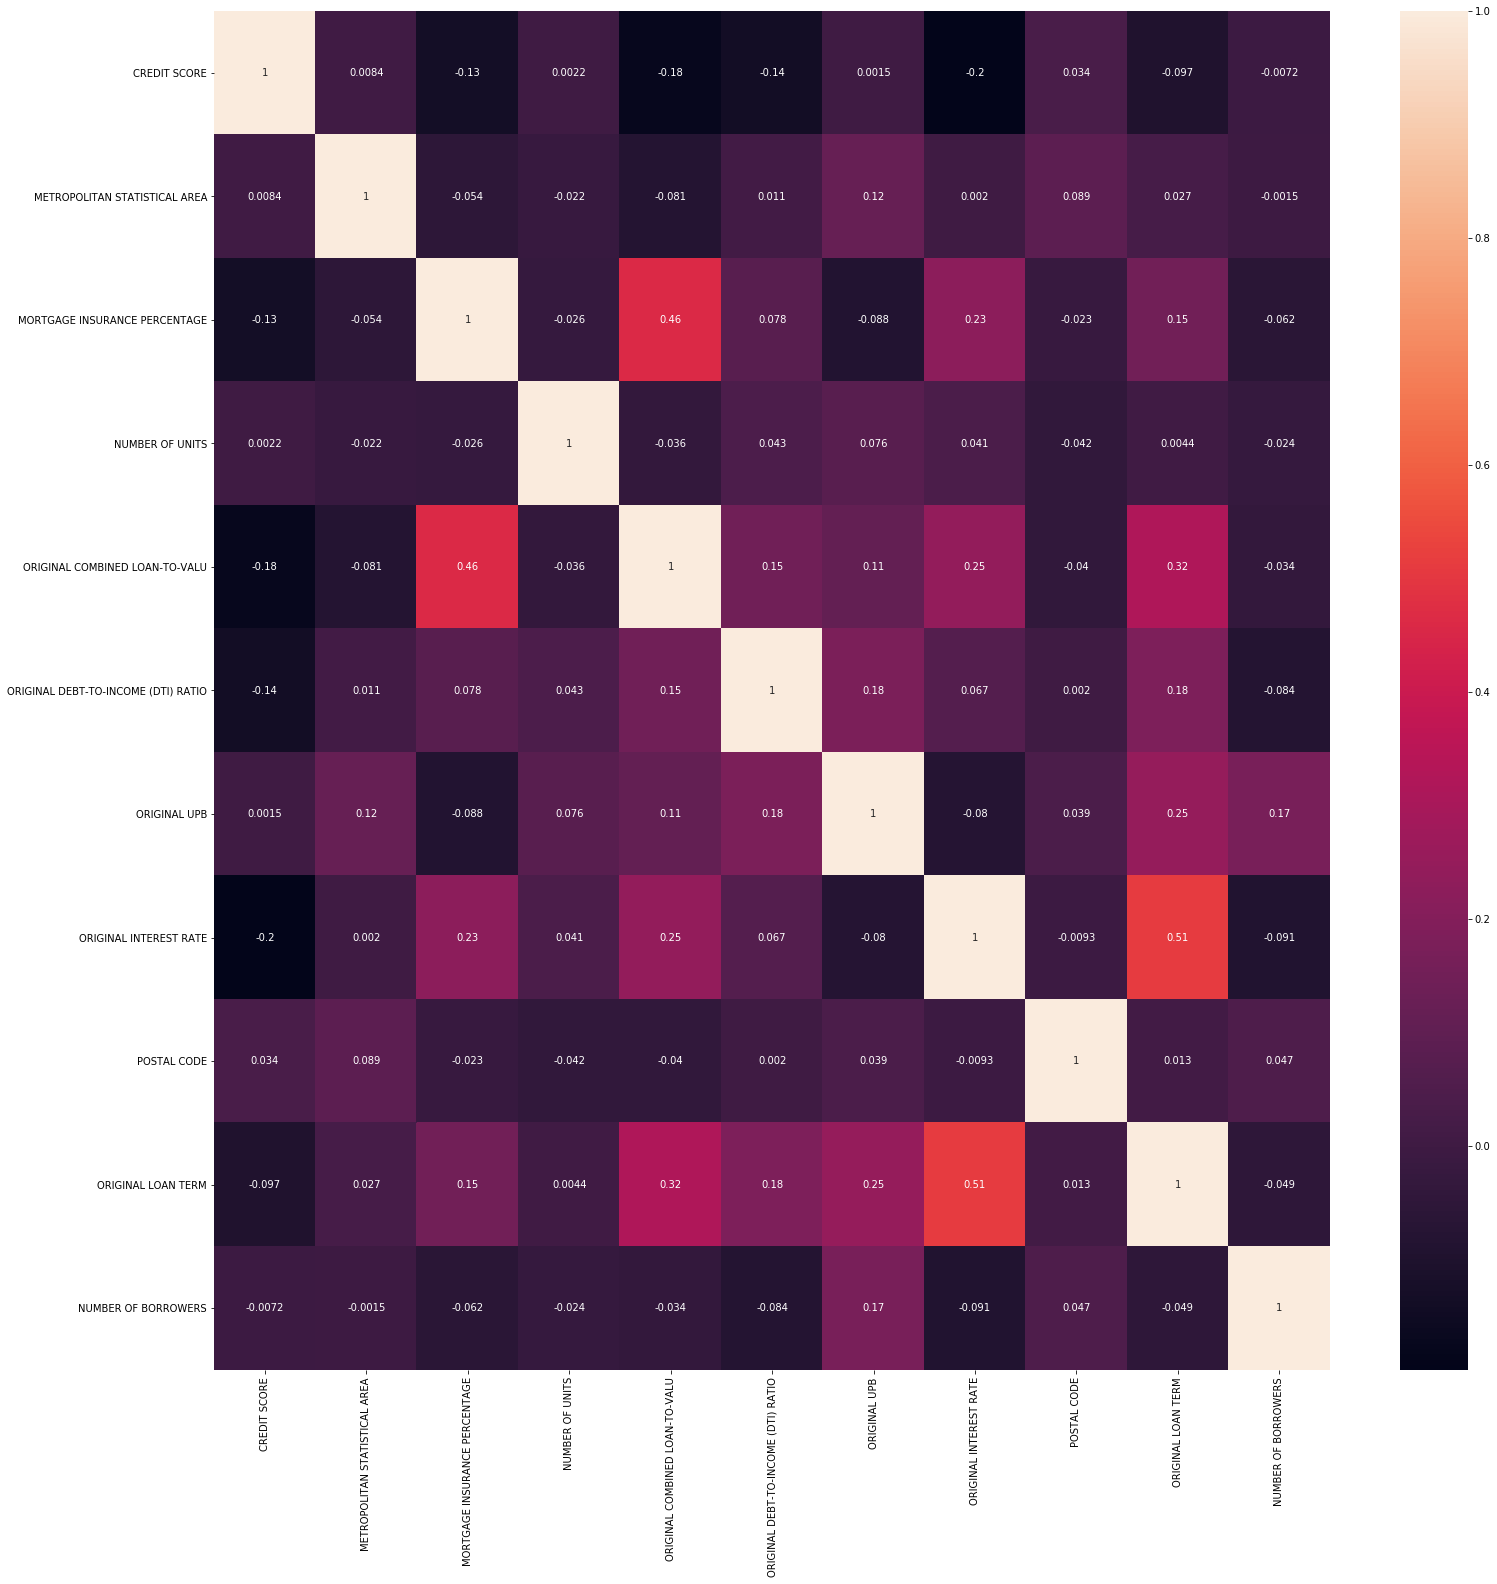

In [15]:
heat_map = data.corr()
plt.figure(figsize=(25,25))
sns.heatmap(heat_map,annot=True,vmax=1)
plt.show()

In [9]:
categorical_columns = data.select_dtypes(include=['object']).columns
numeric_columns = data.select_dtypes(include=['float64','int64']).columns
for col in categorical_columns:
    data[col] = data[col].astype('category')


#p_categories = df['purpose'].cat.categories.tolist()
#s_categories = df['addr_state'].cat.categories.tolist()
#print(dict( enumerate(df['purpose'].cat.categories) ))

data[categorical_columns] = data[categorical_columns].apply(lambda x: x.cat.codes)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351634 entries, 0 to 351633
Data columns (total 20 columns):
CREDIT SCORE                           351634 non-null float64
FIRST TIME HOMEBUYER FLAG              351634 non-null int8
METROPOLITAN STATISTICAL AREA          351634 non-null float64
MORTGAGE INSURANCE PERCENTAGE          351634 non-null int64
NUMBER OF UNITS                        351634 non-null int64
OCCUPANCY STATUS                       351634 non-null int8
ORIGINAL COMBINED LOAN-TO-VALU         351634 non-null int64
ORIGINAL DEBT-TO-INCOME (DTI) RATIO    351634 non-null float64
ORIGINAL UPB                           351634 non-null int64
ORIGINAL INTEREST RATE                 351634 non-null float64
CHANNE                                 351634 non-null int8
PREPAYMENT PENALTY MORTGAGE FLAG       351634 non-null int8
PROPERTY STATE                         351634 non-null int8
PROPERTY TYPE                          351634 non-null int8
POSTAL CODE                      

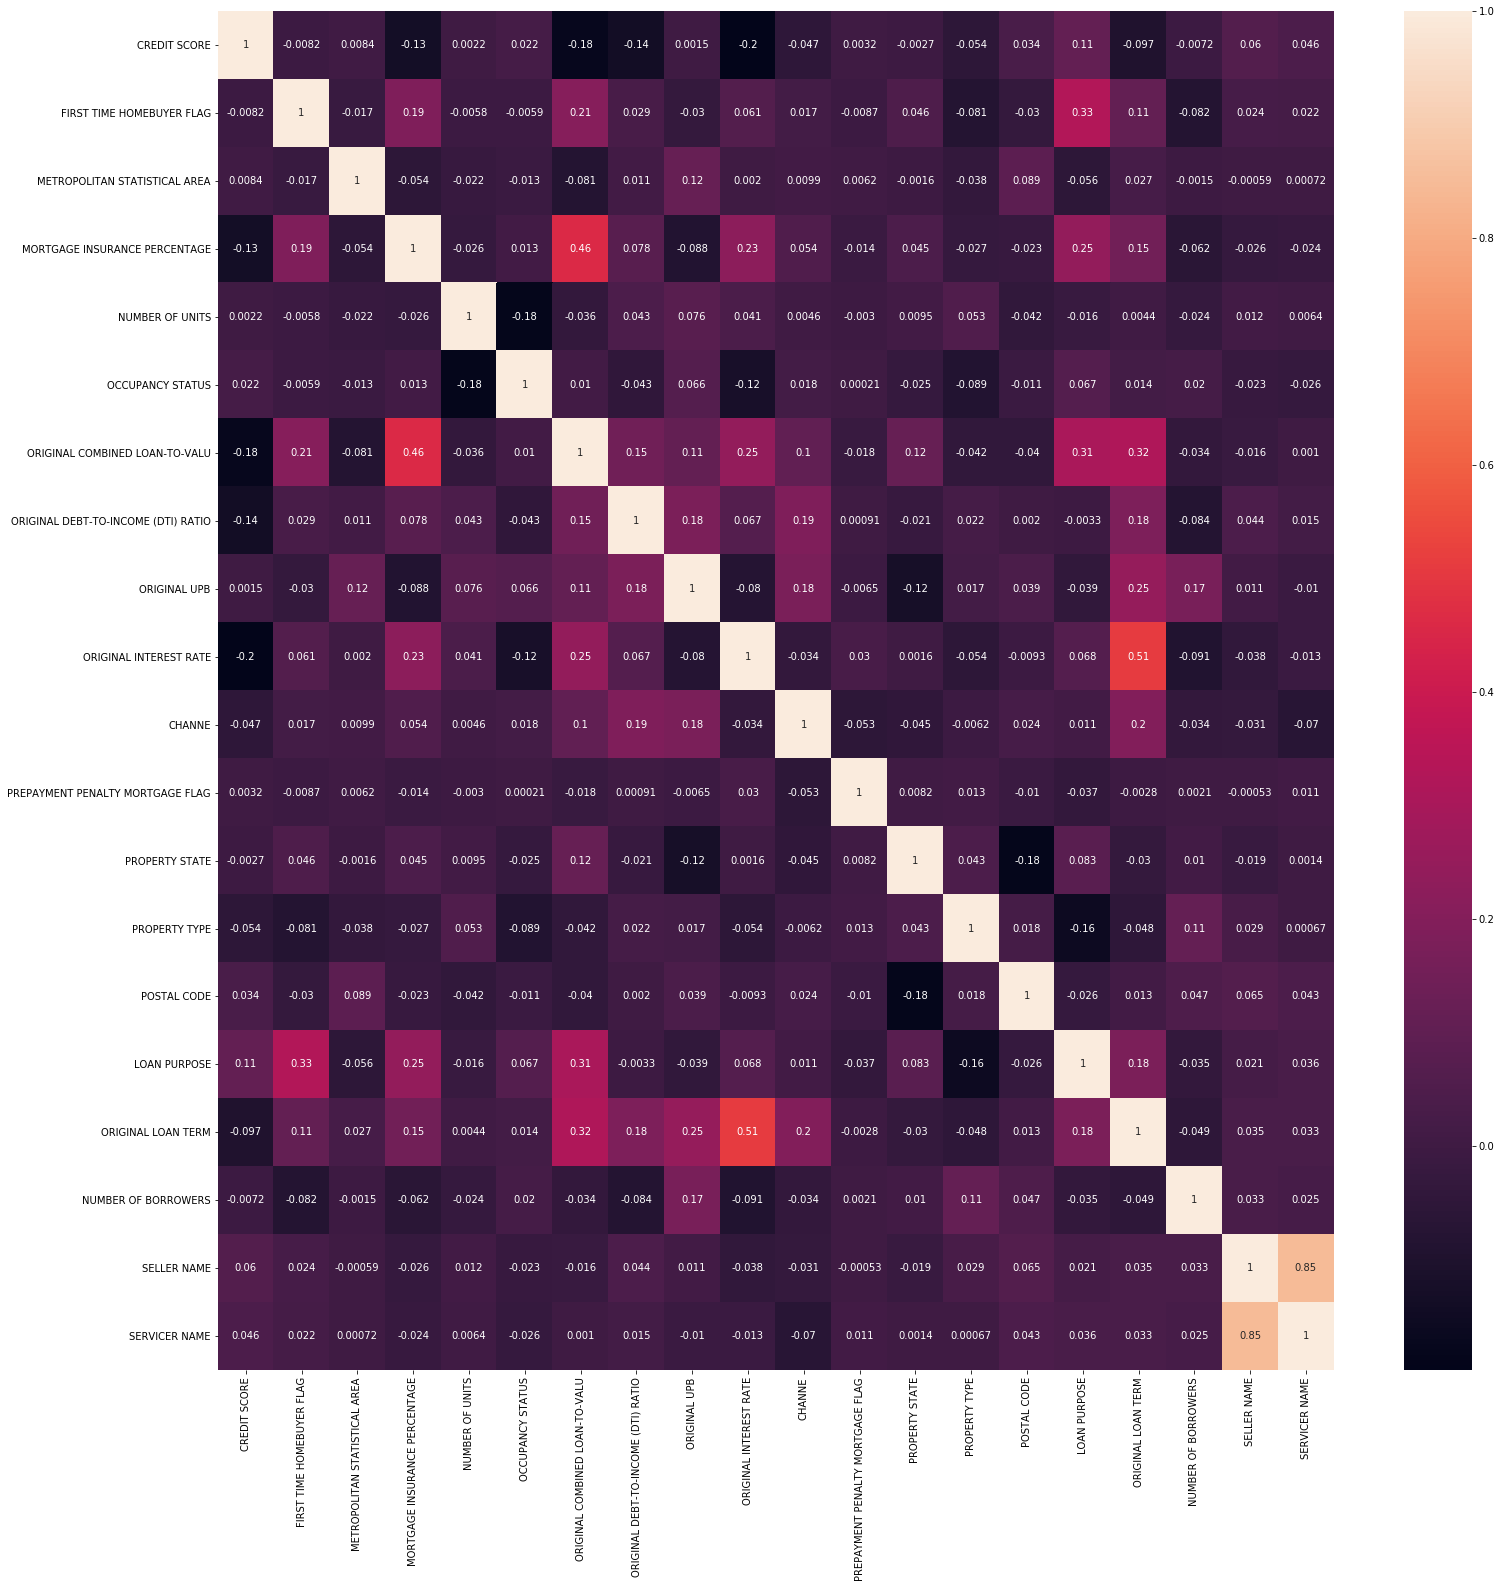

In [18]:
heat_map = data.corr()
plt.figure(figsize=(25,25))
sns.heatmap(heat_map,annot=True,vmax=1)
plt.show()

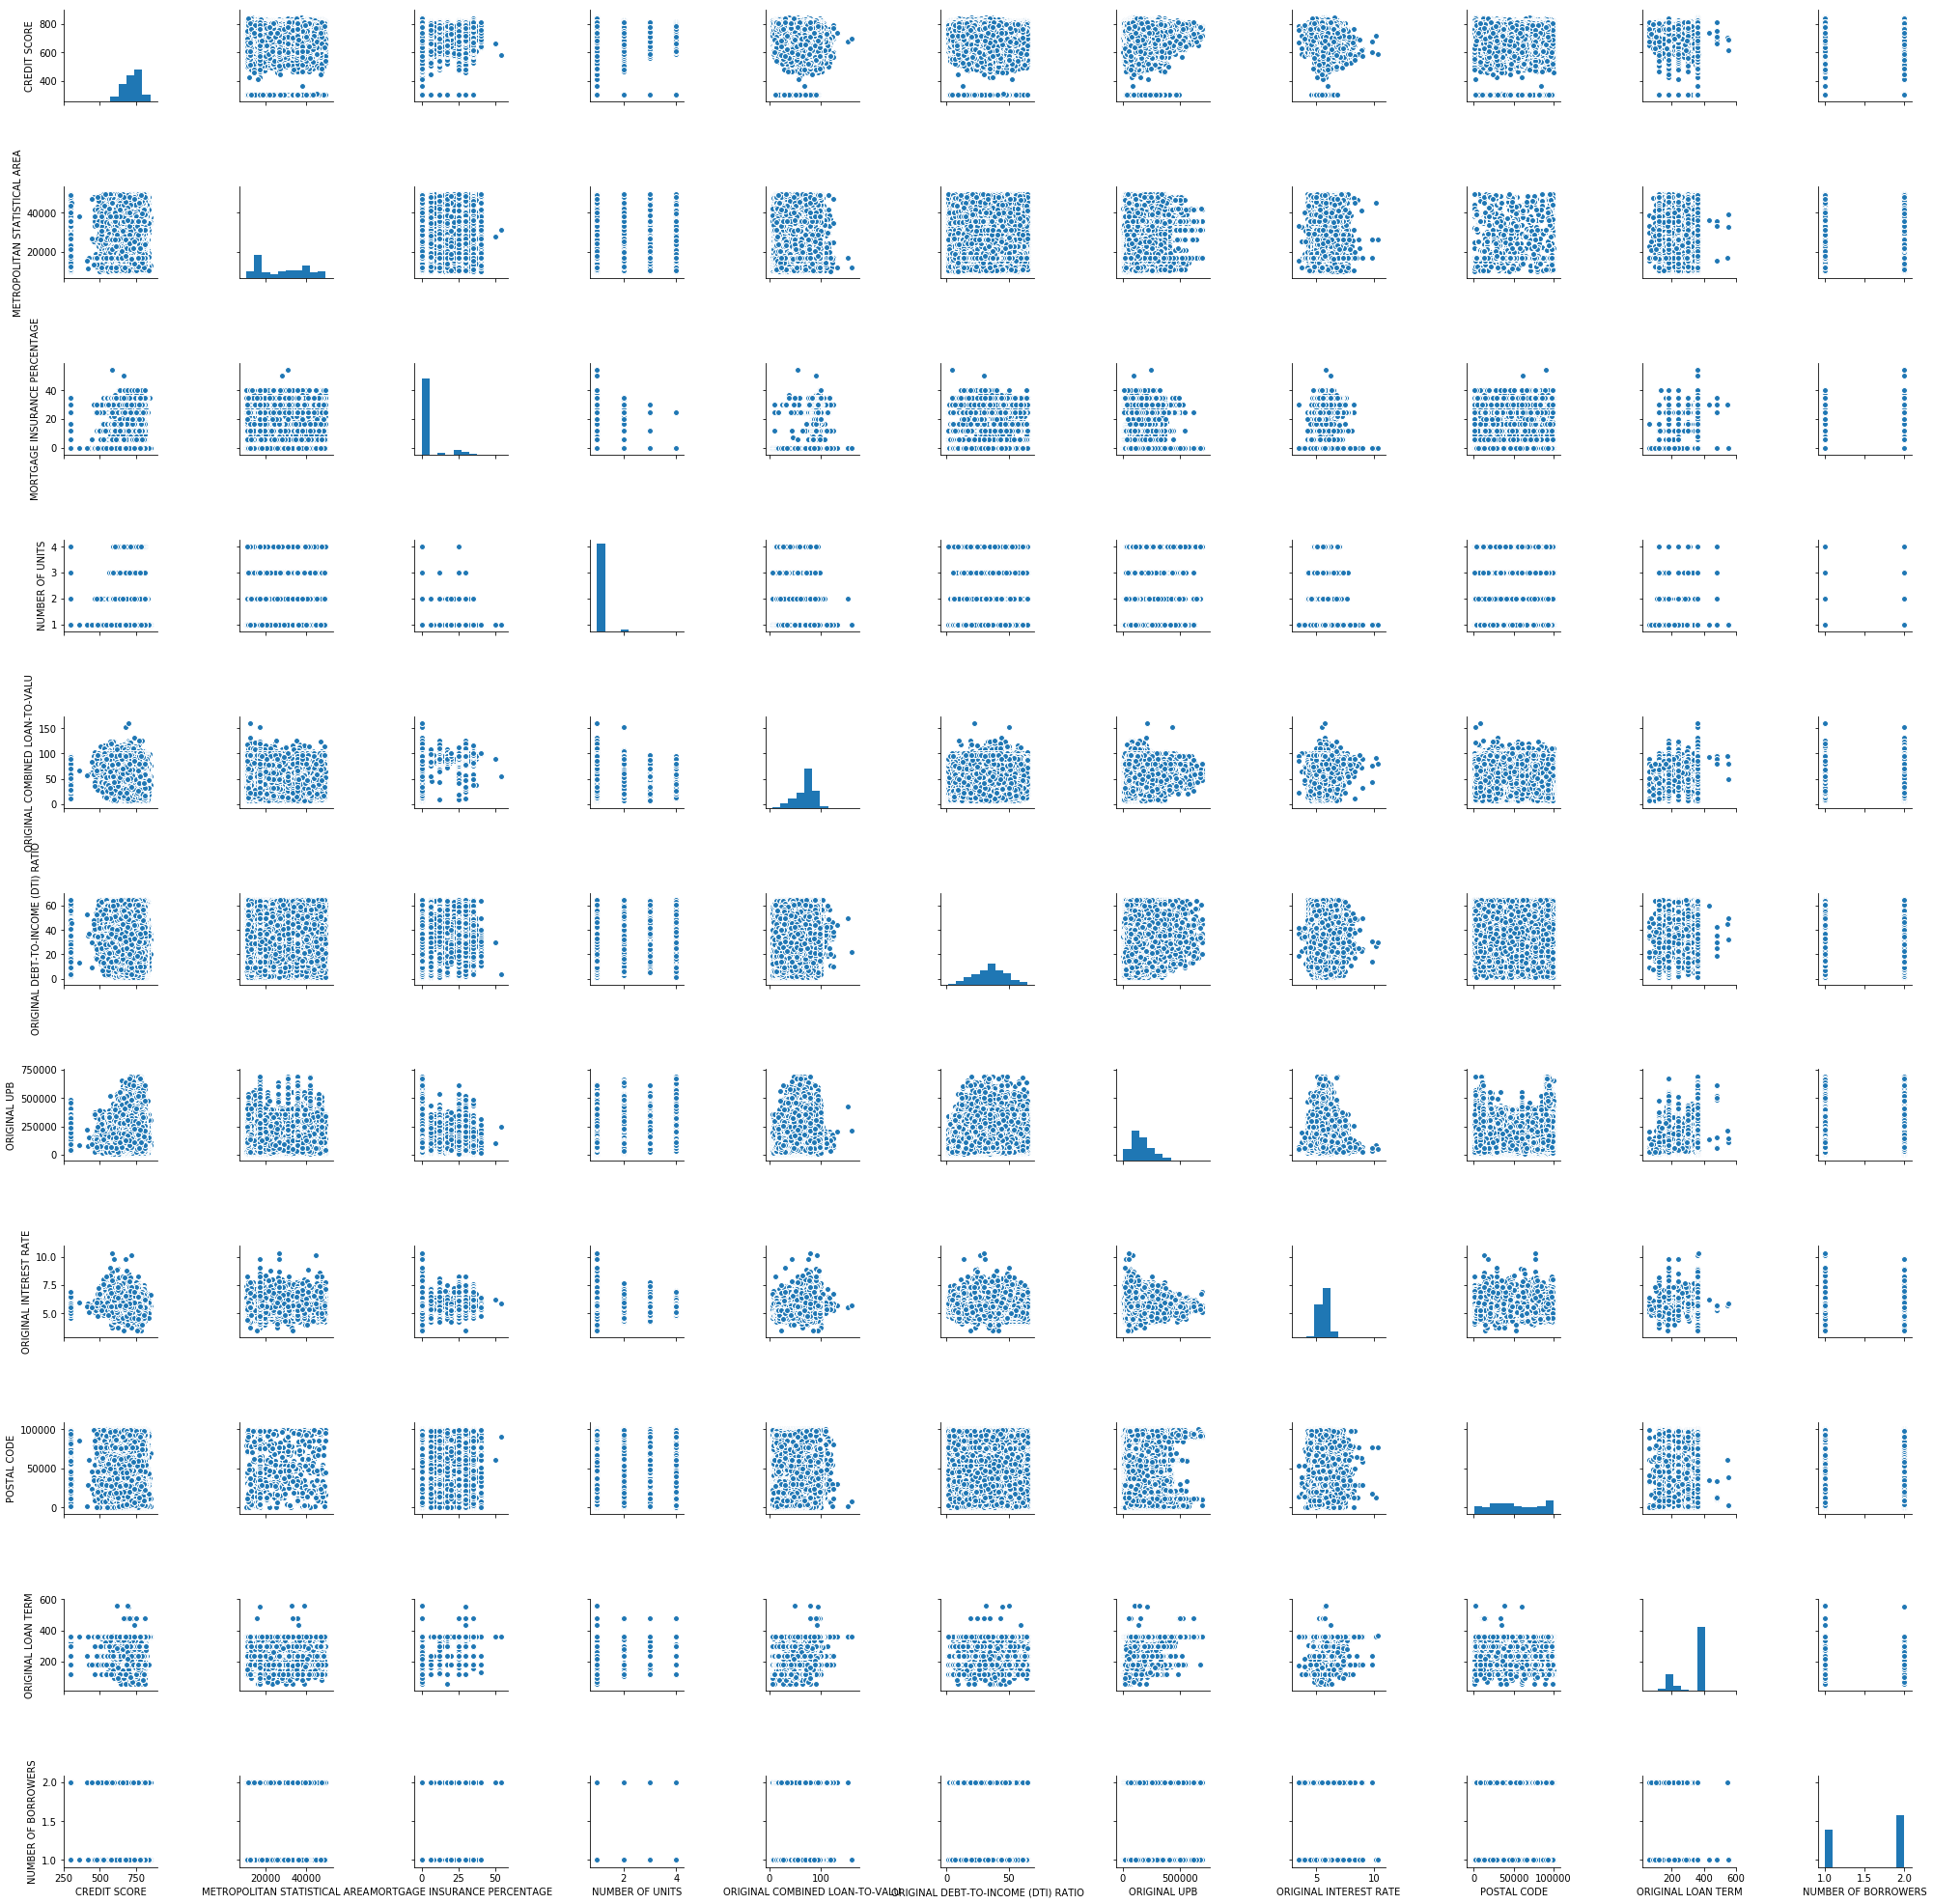

In [19]:
pdata=data[numeric_columns]
sns.pairplot(pdata)
plt.show()

In [10]:
def preprocessing(data):
    data['POSTAL CODE'].fillna(85200.0,inplace=True)
    data['PREPAYMENT PENALTY MORTGAGE FLAG'].fillna('N',inplace=True)
    data['METROPOLITAN STATISTICAL AREA'].fillna(16974.0,inplace=True)
    data.drop(['SUPER CONFORMING FLAG'],axis=1,inplace=True)
    data['CREDIT SCORE'].replace(to_replace=9999, value=np.nan, inplace=True)
    data['CREDIT SCORE'].fillna((data['CREDIT SCORE'].mean()), inplace=True)
    data['FIRST TIME HOMEBUYER FLAG'].replace(to_replace='9', value=np.nan, inplace=True)
    data['FIRST TIME HOMEBUYER FLAG'].fillna('N', inplace=True)
    data['Maturity_year'] =  [int(str(d)[:4]) for d in data['MATURITY DATE']]
    del data['MATURITY DATE']
    data['MORTGAGE INSURANCE PERCENTAGE'].replace(to_replace=999,value=0,inplace=True)
    data['NUMBER OF UNITS'].replace(to_replace=99,value=1,inplace=True)

    data['ORIGINAL COMBINED LOAN-TO-VALU'].replace(to_replace=999,value=80,inplace=True)

    data['ORIGINAL DEBT-TO-INCOME (DTI) RATIO'].replace(to_replace=999,value=float('nan'),inplace=True)
    data['ORIGINAL DEBT-TO-INCOME (DTI) RATIO'].fillna(data['ORIGINAL DEBT-TO-INCOME (DTI) RATIO'].mean(),inplace=True)

    data['ORIGINAL LOAN-TO-VALUE'].replace(to_replace=999,value=float('nan'),inplace=True)
    data['ORIGINAL LOAN-TO-VALUE'].fillna(data['ORIGINAL LOAN-TO-VALUE'].mean(),inplace=True)

    data.drop('PRODUCT TYPE',axis=1,inplace=True)
    data.drop('LOAN SEQUENCE NUMBER',axis=1,inplace=True)

    data['PROPERTY TYPE'].replace(to_replace=99,value='SF',inplace=True)
    data['LOAN PURPOSE'].replace(to_replace=9,value='C',inplace=True)
    data['NUMBER OF BORROWERS'].replace(to_replace=99,value=2,inplace=True)

    del data['FIRST PAYMENT DATE']

    data.drop('ORIGINAL LOAN-TO-VALUE',axis=1,inplace=True)
    data.drop('Maturity_year',axis=1,inplace=True)

    categorical_columns = data.select_dtypes(include=['object']).columns
    numeric_columns = data.select_dtypes(include=['float64','int64']).columns
    for col in categorical_columns:
        data[col] = data[col].astype('category')

    #p_categories = df['purpose'].cat.categories.tolist()
    #s_categories = df['addr_state'].cat.categories.tolist()
    #print(dict( enumerate(df['purpose'].cat.categories) ))

    data[categorical_columns] = data[categorical_columns].apply(lambda x: x.cat.codes)
    return data

In [11]:
val = pd.read_csv("datapart2/historical_data1_Q22005.txt",sep="|",header=None)
val.columns = ["CREDIT SCORE","FIRST PAYMENT DATE","FIRST TIME HOMEBUYER FLAG","MATURITY DATE","METROPOLITAN STATISTICAL AREA",
               "MORTGAGE INSURANCE PERCENTAGE","NUMBER OF UNITS","OCCUPANCY STATUS","ORIGINAL COMBINED LOAN-TO-VALU","ORIGINAL DEBT-TO-INCOME (DTI) RATIO",
               "ORIGINAL UPB","ORIGINAL LOAN-TO-VALUE","ORIGINAL INTEREST RATE","CHANNE","PREPAYMENT PENALTY MORTGAGE FLAG",
               "PRODUCT TYPE","PROPERTY STATE","PROPERTY TYPE","POSTAL CODE","LOAN SEQUENCE NUMBER","LOAN PURPOSE",
               "ORIGINAL LOAN TERM","NUMBER OF BORROWERS","SELLER NAME","SERVICER NAME","SUPER CONFORMING FLAG"
                #,"Pre-HARP LOAN SEQUENCE NUMBER"
                ]
val.head()

,CREDIT SCORE,FIRST PAYMENT DATE,FIRST TIME HOMEBUYER FLAG,MATURITY DATE,METROPOLITAN STATISTICAL AREA,MORTGAGE INSURANCE PERCENTAGE,NUMBER OF UNITS,OCCUPANCY STATUS,ORIGINAL COMBINED LOAN-TO-VALU,ORIGINAL DEBT-TO-INCOME (DTI) RATIO,ORIGINAL UPB,ORIGINAL LOAN-TO-VALUE,ORIGINAL INTEREST RATE,CHANNE,PREPAYMENT PENALTY MORTGAGE FLAG,PRODUCT TYPE,PROPERTY STATE,PROPERTY TYPE,POSTAL CODE,LOAN SEQUENCE NUMBER,LOAN PURPOSE,ORIGINAL LOAN TERM,NUMBER OF BORROWERS,SELLER NAME,SERVICER NAME,SUPER CONFORMING FLAG
0,715,200508,N,203507,33700.0,0,1,P,58,41,214000,58,5.750,R,N,FRM,CA,SF,95300.0,F105Q2000001,C,360,2,Other sellers,"WELLSFARGOBANK,NA",NaN
1,743,200508,N,203507,NaN,0,1,P,80,36,340000,80,5.875,R,N,FRM,IL,SF,62400.0,F105Q2000002,N,360,2,Other sellers,"PNCMTGESERVICES,INC",NaN
2,772,200508,N,203507,37860.0,0,1,P,80,34,184000,80,5.500,R,N,FRM,FL,PU,32500.0,F105Q2000003,P,360,1,Other sellers,Other servicers,NaN
3,773,200507,N,203506,NaN,0,1,P,64,60,260000,64,5.875,R,N,FRM,MN,SF,56300.0,F105Q2000004,N,360,2,Other sellers,USBANKNA,NaN
4,647,200508,N,203507,NaN,30,1,P,91,28,170000,91,6.000,R,N,FRM,MI,SF,49200.0,F105Q2000005,N,360,1,Other sellers,Other servicers,NaN


In [12]:
val=preprocessing(val)

In [23]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405679 entries, 0 to 405678
Data columns (total 20 columns):
CREDIT SCORE                           405679 non-null float64
FIRST TIME HOMEBUYER FLAG              405679 non-null int8
METROPOLITAN STATISTICAL AREA          405679 non-null float64
MORTGAGE INSURANCE PERCENTAGE          405679 non-null int64
NUMBER OF UNITS                        405679 non-null int64
OCCUPANCY STATUS                       405679 non-null int8
ORIGINAL COMBINED LOAN-TO-VALU         405679 non-null int64
ORIGINAL DEBT-TO-INCOME (DTI) RATIO    405679 non-null float64
ORIGINAL UPB                           405679 non-null int64
ORIGINAL INTEREST RATE                 405679 non-null float64
CHANNE                                 405679 non-null int8
PREPAYMENT PENALTY MORTGAGE FLAG       405679 non-null int8
PROPERTY STATE                         405679 non-null int8
PROPERTY TYPE                          405679 non-null int8
POSTAL CODE                      

In [27]:
val.describe()

,CREDIT SCORE,FIRST TIME HOMEBUYER FLAG,METROPOLITAN STATISTICAL AREA,MORTGAGE INSURANCE PERCENTAGE,NUMBER OF UNITS,OCCUPANCY STATUS,ORIGINAL COMBINED LOAN-TO-VALU,ORIGINAL DEBT-TO-INCOME (DTI) RATIO,ORIGINAL UPB,ORIGINAL INTEREST RATE,CHANNE,PREPAYMENT PENALTY MORTGAGE FLAG,PROPERTY STATE,PROPERTY TYPE,POSTAL CODE,LOAN PURPOSE,ORIGINAL LOAN TERM,NUMBER OF BORROWERS,SELLER NAME,SERVICER NAME
count,405679.000000,405679.000000,405679.000000,405679.000000,405679.000000,405679.000000,405679.000000,405679.000000,405679.000000,405679.000000,405679.000000,405679.000000,405679.000000,405679.000000,405679.000000,405679.000000,405679.000000,405679.000000,405679.000000,405679.000000
mean,725.013699,0.092586,28399.128316,3.453469,1.026528,1.019518,71.365121,35.162950,168421.338053,5.790441,2.527794,0.001962,24.344455,4.572329,50691.421050,1.078276,322.696265,1.584400,8.282896,10.370534
std,58.462244,0.289851,11541.597761,8.949886,0.204951,0.281905,18.184854,12.024046,84762.200840,0.350590,0.506920,0.044253,15.392038,1.046130,29055.233116,0.877178,71.202132,0.492826,4.823953,5.375781
min,300.000000,0.000000,10180.000000,0.000000,1.000000,0.000000,6.000000,1.000000,5000.000000,3.000000,0.000000,0.000000,0.000000,0.000000,600.000000,0.000000,60.000000,1.000000,0.000000,0.000000
25%,684.000000,0.000000,16974.000000,0.000000,1.000000,1.000000,61.000000,27.000000,103000.000000,5.625000,2.000000,0.000000,9.000000,5.000000,28300.000000,0.000000,360.000000,1.000000,4.000000,7.000000
50%,732.000000,0.000000,28140.000000,0.000000,1.000000,1.000000,77.000000,35.162950,151000.000000,5.750000,3.000000,0.000000,23.000000,5.000000,48100.000000,1.000000,360.000000,2.000000,9.000000,11.000000
75%,773.000000,0.000000,38300.000000,0.000000,1.000000,1.000000,80.000000,43.000000,220000.000000,6.000000,3.000000,0.000000,37.000000,5.000000,77400.000000,2.000000,360.000000,2.000000,13.000000,17.000000
max,850.000000,1.000000,49740.000000,40.000000,4.000000,2.000000,182.000000,65.000000,800000.000000,8.875000,3.000000,1.000000,53.000000,5.000000,99900.000000,2.000000,624.000000,2.000000,14.000000,17.000000


In [13]:
(X,Y)=(data.drop('ORIGINAL INTEREST RATE',axis=1),data['ORIGINAL INTEREST RATE'])

In [14]:
(train_x,test_x,train_y,test_y)=train_test_split(X,Y,random_state=42)


In [132]:
print(train_x.shape)
print(train_y.shape)

(263725, 19)
(263725,)


In [15]:
(vali_x,vali_y)=(val.drop('ORIGINAL INTEREST RATE',axis=1),val['ORIGINAL INTEREST RATE'])

In [16]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
pred_y = lin_reg.predict(test_x)
print("Score for train: "+str(lin_reg.score(train_x,train_y)))
print("Score: "+str(lin_reg.score(test_x,test_y)))
print("Score for Validates: "+str(lin_reg.score(vali_x,vali_y)))
print("RMS: "+str(sqrt(metrics.mean_squared_error(test_y,pred_y))))
print("MAPE: "+str(mean_absolute_percentage_error(test_y,pred_y)))
print("R2: "+str(metrics.r2_score(test_y,pred_y)))
print("MAE: "+str(metrics.mean_absolute_error(test_y,pred_y)))

Score for train: 0.3796023837643583
Score: 0.3762726780300457
Score for Validates: 0.1404384120746618
RMS: 0.2902291332130352
MAPE: 3.7955419310984304
R2: 0.3762726780300457
MAE: 0.21457052476464963


In [158]:
dt_reg = DecisionTreeRegressor(max_depth=12)
dt_reg.fit(train_x,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=12, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [160]:
pred_y = dt_reg.predict(test_x)
print("Score for train: "+str(dt_reg.score(train_x,train_y)))
print("Score: "+str(dt_reg.score(test_x,test_y)))
print("Score for Validates: "+str(dt_reg.score(vali_x,vali_y)))
print("RMS: "+str(sqrt(metrics.mean_squared_error(test_y,pred_y))))
print("MAPE: "+str(mean_absolute_percentage_error(test_y,pred_y)))
print("R2: "+str(metrics.r2_score(test_y,pred_y)))
print("MAE: "+str(metrics.mean_absolute_error(test_y,pred_y)))

Score for train: 0.5078875288306632
Score: 0.4442478095440843
Score for Validates: 0.13830865015362426
RMS: 0.27395814198777685
MAPE: 3.561596153741932
R2: 0.44424780954408427
MAE: 0.20139221095571988


In [139]:
#Ridge Regression
ridge= Ridge()
ridge.fit(train_x, train_y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [140]:
pred_y = ridge.predict(test_x)
print("Score for train: "+str(ridge.score(train_x,train_y)))
print("Score: "+str(ridge.score(test_x,test_y)))
print("RMS: "+str(sqrt(metrics.mean_squared_error(test_y,pred_y))))
print("MAPE: "+str(mean_absolute_percentage_error(test_y,pred_y)))
print("R2: "+str(metrics.r2_score(test_y,pred_y)))
print("MAE: "+str(metrics.mean_absolute_error(test_y,pred_y)))

Score for train: 0.3796023765185884
Score: 0.3762751028471253
RMS: 0.2902285690616678
MAPE: 3.7955308051262002
R2: 0.3762751028471253
MAE: 0.2145699188846787


In [141]:
#Lasso
lasso= linear_model.Lasso()
lasso.fit(train_x, train_y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [142]:
pred_y = lasso.predict(test_x)
print("Score for train: "+str(lasso.score(train_x,train_y)))
print("Score: "+str(lasso.score(test_x,test_y)))
print("RMS: "+str(sqrt(metrics.mean_squared_error(test_y,pred_y))))
print("MAPE: "+str(mean_absolute_percentage_error(test_y,pred_y)))
print("R2: "+str(metrics.r2_score(test_y,pred_y)))
print("MAE: "+str(metrics.mean_absolute_error(test_y,pred_y)))

Score for train: 0.32620023329808334
Score: 0.3256689718171202
RMS: 0.3017728693444543
MAPE: 3.9279605703831586
R2: 0.3256689718171202
MAE: 0.22203392846164843


In [143]:
#BayesianRidge
bys = linear_model.BayesianRidge()
bys.fit(train_x, train_y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [144]:
bys.predict(test_x)
print("Score for train: "+str(bys.score(train_x,train_y)))
print("Score: "+str(bys.score(test_x,test_y)))
print("RMS: "+str(sqrt(metrics.mean_squared_error(test_y,pred_y))))
print("MAPE: "+str(mean_absolute_percentage_error(test_y,pred_y)))
print("R2: "+str(metrics.r2_score(test_y,pred_y)))
print("MAE: "+str(metrics.mean_absolute_error(test_y,pred_y)))

Score for train: 0.37960115845658526
Score: 0.37630328482951264
RMS: 0.3017728693444543
MAPE: 3.9279605703831586
R2: 0.3256689718171202
MAE: 0.22203392846164843


In [145]:
#LARS Lasso
lars = linear_model.LassoLars(alpha=.1)
lars.fit(train_x, train_y)

LassoLars(alpha=0.1, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)

In [146]:
lars.predict(test_x)
print("Score for train: "+str(lars.score(train_x,train_y)))
print("Score: "+str(lars.score(test_x,test_y)))
print("RMS: "+str(sqrt(metrics.mean_squared_error(test_y,pred_y))))
print("MAPE: "+str(mean_absolute_percentage_error(test_y,pred_y)))
print("R2: "+str(metrics.r2_score(test_y,pred_y)))
print("MAE: "+str(metrics.mean_absolute_error(test_y,pred_y)))

Score for train: 0.0
Score: -4.5819086726961444e-06
RMS: 0.3017728693444543
MAPE: 3.9279605703831586
R2: 0.3256689718171202
MAE: 0.22203392846164843


In [147]:
#Polynomial regression
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
model = model.fit(train_x,train_y)

In [148]:
pred_y = model.predict(test_x)
print("Score for train: "+str(model.score(train_x,train_y)))
print("Score: "+str(model.score(test_x,test_y)))
print("RMS: "+str(sqrt(metrics.mean_squared_error(test_y,pred_y))))
print("MAPE: "+str(mean_absolute_percentage_error(test_y,pred_y)))
print("R2: "+str(metrics.r2_score(test_y,pred_y)))
print("MAE: "+str(metrics.mean_absolute_error(test_y,pred_y)))

Score for train: 0.42833617292393733
Score: 0.42405829245668214
RMS: 0.27888996345489536
MAPE: 3.6463686505196025
R2: 0.42405829245668214
MAE: 0.20595745270254315


### RFE

In [162]:
#iteratively find the best 
dt_reg = DecisionTreeRegressor(max_depth=12)
min=0
for i in range(3,19):
    rfe = RFE(dt_reg,i)
    rfe = rfe.fit(train_x,train_y)
    pred_y = rfe.predict(test_x)
    score = rfe.score(test_x,test_y)
    print("Score for "+str(i)+" feature: "+str(score))
    if (score>min) :
        min = score
        best_rfe = rfe
pred_y = best_rfe.predict(test_x)
print("Score for train: "+str(best_rfe.score(train_x,train_y)))
print("Score: "+str(best_rfe.score(test_x,test_y)))
print("Score for Validates: "+str(best_rfe.score(vali_x,vali_y)))
print("RMS: "+str(sqrt(metrics.mean_squared_error(test_y,pred_y))))
print("MAPE: "+str(mean_absolute_percentage_error(test_y,pred_y)))
print("R2: "+str(metrics.r2_score(test_y,pred_y)))
print("MAE: "+str(metrics.mean_absolute_error(test_y,pred_y)))

Score for 3 feature: 0.363867527315185
Score for 4 feature: 0.3871848776409451
Score for 5 feature: 0.3963625467386667
Score for 6 feature: 0.40979931955818266
Score for 7 feature: 0.4263999768419809
Score for 8 feature: 0.43191421085944176
Score for 9 feature: 0.42500452868185556
Score for 10 feature: 0.4282354055152687
Score for 11 feature: 0.43981942528433765
Score for 12 feature: 0.43984180121579636
Score for 13 feature: 0.43938771789150066
Score for 14 feature: 0.4417575121514287
Score for 15 feature: 0.44211525136867363
Score for 16 feature: 0.4447257758333586
Score for 17 feature: 0.44430385329661237
Score for 18 feature: 0.44393331391914675
Score for train: 0.5081298161689771
Score: 0.4447257758333586
Score for Validates: 0.13675168350196032
RMS: 0.2738403098633692
MAPE: 3.5605674964829888
R2: 0.4447257758333586
MAE: 0.20134327141925398


In [128]:
print(best_rfe.support_)
print(best_rfe.ranking_)
train_x.iloc[:,pd.Series(best_rfe.support_).values].head()

[ True False False  True False  True  True  True  True  True False False
 False  True  True  True False  True  True]
[1 6 5 1 7 1 1 1 1 1 2 4 3 1 1 1 8 1 1]


,CREDIT SCORE,MORTGAGE INSURANCE PERCENTAGE,OCCUPANCY STATUS,ORIGINAL COMBINED LOAN-TO-VALU,ORIGINAL DEBT-TO-INCOME (DTI) RATIO,ORIGINAL UPB,CHANNE,POSTAL CODE,LOAN PURPOSE,ORIGINAL LOAN TERM,SELLER NAME,SERVICER NAME
0,699.0,0,1,56,42.0,190000,2,2800.0,0,360,8,14
1,691.0,25,1,90,36.0,90000,2,73000.0,1,360,8,10
2,713.0,0,1,72,45.0,357000,2,12500.0,2,360,8,10
3,719.0,0,2,85,47.0,195000,2,65000.0,2,360,8,14
4,656.0,0,1,68,30.0,253000,2,55900.0,0,360,8,10


In [164]:
train_x=train_x.iloc[:,pd.Series(best_rfe.support_).values]

In [23]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263725 entries, 195334 to 121958
Data columns (total 12 columns):
CREDIT SCORE                           263725 non-null float64
MORTGAGE INSURANCE PERCENTAGE          263725 non-null int64
OCCUPANCY STATUS                       263725 non-null int8
ORIGINAL COMBINED LOAN-TO-VALU         263725 non-null int64
ORIGINAL DEBT-TO-INCOME (DTI) RATIO    263725 non-null float64
ORIGINAL UPB                           263725 non-null int64
CHANNE                                 263725 non-null int8
POSTAL CODE                            263725 non-null float64
LOAN PURPOSE                           263725 non-null int8
ORIGINAL LOAN TERM                     263725 non-null int64
SELLER NAME                            263725 non-null int8
SERVICER NAME                          263725 non-null int8
dtypes: float64(3), int64(4), int8(5)
memory usage: 17.4 MB


In [167]:
test_x=test_x.iloc[:,pd.Series(best_rfe.support_).values]
vali_x=vali_x.iloc[:,pd.Series(best_rfe.support_).values]

In [22]:
train_x=train_x[['CREDIT SCORE','MORTGAGE INSURANCE PERCENTAGE','OCCUPANCY STATUS','ORIGINAL COMBINED LOAN-TO-VALU'
,'ORIGINAL DEBT-TO-INCOME (DTI) RATIO','ORIGINAL UPB','CHANNE','POSTAL CODE'
,'LOAN PURPOSE','ORIGINAL LOAN TERM','SELLER NAME','SERVICER NAME']]

In [24]:
test_x=test_x[['CREDIT SCORE','MORTGAGE INSURANCE PERCENTAGE','OCCUPANCY STATUS','ORIGINAL COMBINED LOAN-TO-VALU'
,'ORIGINAL DEBT-TO-INCOME (DTI) RATIO','ORIGINAL UPB','CHANNE','POSTAL CODE'
,'LOAN PURPOSE','ORIGINAL LOAN TERM','SELLER NAME','SERVICER NAME']]
vali_x=vali_x[['CREDIT SCORE','MORTGAGE INSURANCE PERCENTAGE','OCCUPANCY STATUS','ORIGINAL COMBINED LOAN-TO-VALU'
,'ORIGINAL DEBT-TO-INCOME (DTI) RATIO','ORIGINAL UPB','CHANNE','POSTAL CODE'
,'LOAN PURPOSE','ORIGINAL LOAN TERM','SELLER NAME','SERVICER NAME']]

In [25]:
rf_reg = RandomForestRegressor()
rf_reg.fit(train_x,train_y)

C:\Users\wenqi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [26]:
pred_y = rf_reg.predict(test_x)
predvali_y = rf_reg.predict(vali_x)
print("Score for train: "+str(rf_reg.score(train_x,train_y)))
print("Score: "+str(rf_reg.score(test_x,test_y)))
print("Score for Validates: "+str(rf_reg.score(vali_x,vali_y)))
print("RMS: "+str(sqrt(metrics.mean_squared_error(test_y,pred_y))))
print("MAPE: "+str(mean_absolute_percentage_error(test_y,pred_y)))
print("R2: "+str(metrics.r2_score(test_y,pred_y)))
print("MAE: "+str(metrics.mean_absolute_error(test_y,pred_y)))

Score for train: 0.9008706997617566
Score: 0.4419497470991327
Score for Validates: 0.12720481138180584
RMS: 0.2745239728039563
MAPE: 3.61102446881148
R2: 0.4419497470991327
MAE: 0.20412124291235048


### MLP

In [184]:
transformer = Normalizer().fit(train_x)
mlp_train_x = pd.DataFrame(transformer.transform(train_x))
mlp_train_x.columns = train_x.columns


mlp_test_x = Normalizer().fit(test_x)
mlp_test_x = pd.DataFrame(transformer.transform(test_x))
mlp_test_x.columns = test_x.columns


mlp_vali_x = Normalizer().fit(vali_x)
mlp_vali_x = pd.DataFrame(transformer.transform(vali_x))
mlp_vali_x.columns = vali_x.columns



In [191]:
#mlp
mlp_reg2 = MLPRegressor(hidden_layer_sizes=(300,20),learning_rate='adaptive',solver='adam',random_state=3,learning_rate_init=0.001,max_iter=400)
mlp_reg.fit(mlp_train_x,train_y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [192]:
pred_y = mlp_reg.predict(mlp_test_x)
predvali_y = mlp_reg.predict(mlp_vali_x)
print("Score for train: "+str(mlp_reg.score(mlp_train_x,train_y)))
print("Score: "+str(mlp_reg.score(mlp_test_x,test_y)))
print("Score for Validates: "+str(mlp_reg.score(mlp_vali_x,vali_y)))
print("RMS: "+str(sqrt(metrics.mean_squared_error(test_y,pred_y))))
print("MAPE: "+str(mean_absolute_percentage_error(test_y,pred_y)))
print("R2: "+str(metrics.r2_score(test_y,pred_y)))
print("MAE: "+str(metrics.mean_absolute_error(test_y,pred_y)))

Score for train: 0.33095149340970675
Score: 0.32981277356684413
Score for Validates: 0.11544130173183842
RMS: 0.30084423496831736
MAPE: 3.9712626159669737
R2: 0.32981277356684413
MAE: 0.2241721231731935


#### tpot

In [195]:
tpot = TPOTRegressor(generations=3,scoring='r2',population_size=10)
tpot.fit(train_x,train_y)

C:\Users\wenqi\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=3,
       max_eval_time_mins=5, max_time_mins=None, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=10,
       random_state=None, scoring='r2', subsample=1.0, use_dask=False,
       verbosity=0, warm_start=False)

In [196]:
tpot.score(test_x,test_y)

0.5002465120133877

In [197]:
tpot.score(vali_x,vali_y)

0.22912604805194192

In [199]:
tpot.export('tpot_assignment3.py')

True

### H2O.ai

In [28]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM 18.3 (build 10.0.2+13, mixed mode)
  Starting server from C:\Users\wenqi\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\wenqi\AppData\Local\Temp\tmpo8gax8nq
  JVM stdout: C:\Users\wenqi\AppData\Local\Temp\tmpo8gax8nq\h2o_wenqi_started_from_python.out
  JVM stderr: C:\Users\wenqi\AppData\Local\Temp\tmpo8gax8nq\h2o_wenqi_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,5 days
H2O cluster name:,H2O_from_python_wenqi_0dva7p
H2O cluster total nodes:,1
H2O cluster free memory:,1.957 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [40]:
train = train_x.copy()
train['ORIGINAL INTEREST RATE']=train_y
train = h2o.H2OFrame(train)


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [41]:
test = test_x.copy()
test['ORIGINAL INTEREST RATE']=test_y
test = h2o.H2OFrame(test)
vali = vali_x.copy()
vali['ORIGINAL INTEREST RATE']=vali_y
vali = h2o.H2OFrame(vali)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [44]:
aml = H2OAutoML(max_runtime_secs = 600, seed = 1, project_name = "lending_club")

In [45]:
aml.train(y = 'ORIGINAL INTEREST RATE', training_frame = train, leaderboard_frame = test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [46]:
aml.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20181127_163657,0.0648463,0.254649,0.0648463,0.188043,0.0379756
StackedEnsemble_BestOfFamily_AutoML_20181127_163657,0.0648578,0.254672,0.0648578,0.188076,0.0379789
GBM_3_AutoML_20181127_163657,0.0650212,0.254993,0.0650212,0.188241,0.0380236
GBM_2_AutoML_20181127_163657,0.0655114,0.255952,0.0655114,0.188877,0.0381675
GBM_1_AutoML_20181127_163657,0.0662132,0.257319,0.0662132,0.189957,0.0383709
DRF_1_AutoML_20181127_163657,0.0677214,0.260233,0.0677214,0.192307,0.0388217
XRT_1_AutoML_20181127_163657,0.0681064,0.260972,0.0681064,0.192858,0.0389194
GLM_grid_1_AutoML_20181127_163657_model_1,0.0849221,0.291414,0.0849221,0.215386,0.043446


### Best Model

In [48]:
gbm_reg = GradientBoostingRegressor()
gbm_reg.fit(train_x,train_y)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
pred_y = gbm_reg.predict(test_x)
print("Score for train: "+str(gbm_reg.score(train_x,train_y)))
print("Score: "+str(gbm_reg.score(test_x,test_y)))
print("Score for Validates: "+str(gbm_reg.score(vali_x,vali_y)))
print("RMS: "+str(sqrt(metrics.mean_squared_error(test_y,pred_y))))
print("MAPE: "+str(mean_absolute_percentage_error(test_y,pred_y)))
print("R2: "+str(metrics.r2_score(test_y,pred_y)))
print("MAE: "+str(metrics.mean_absolute_error(test_y,pred_y)))

Score for train: 0.46086991091271506
Score: 0.4570036884596484
Score for Validates: 0.20870687699159152
RMS: 0.27079588486155737
MAPE: 3.543499335617342
R2: 0.45700368845964845
MAE: 0.2002401055731006


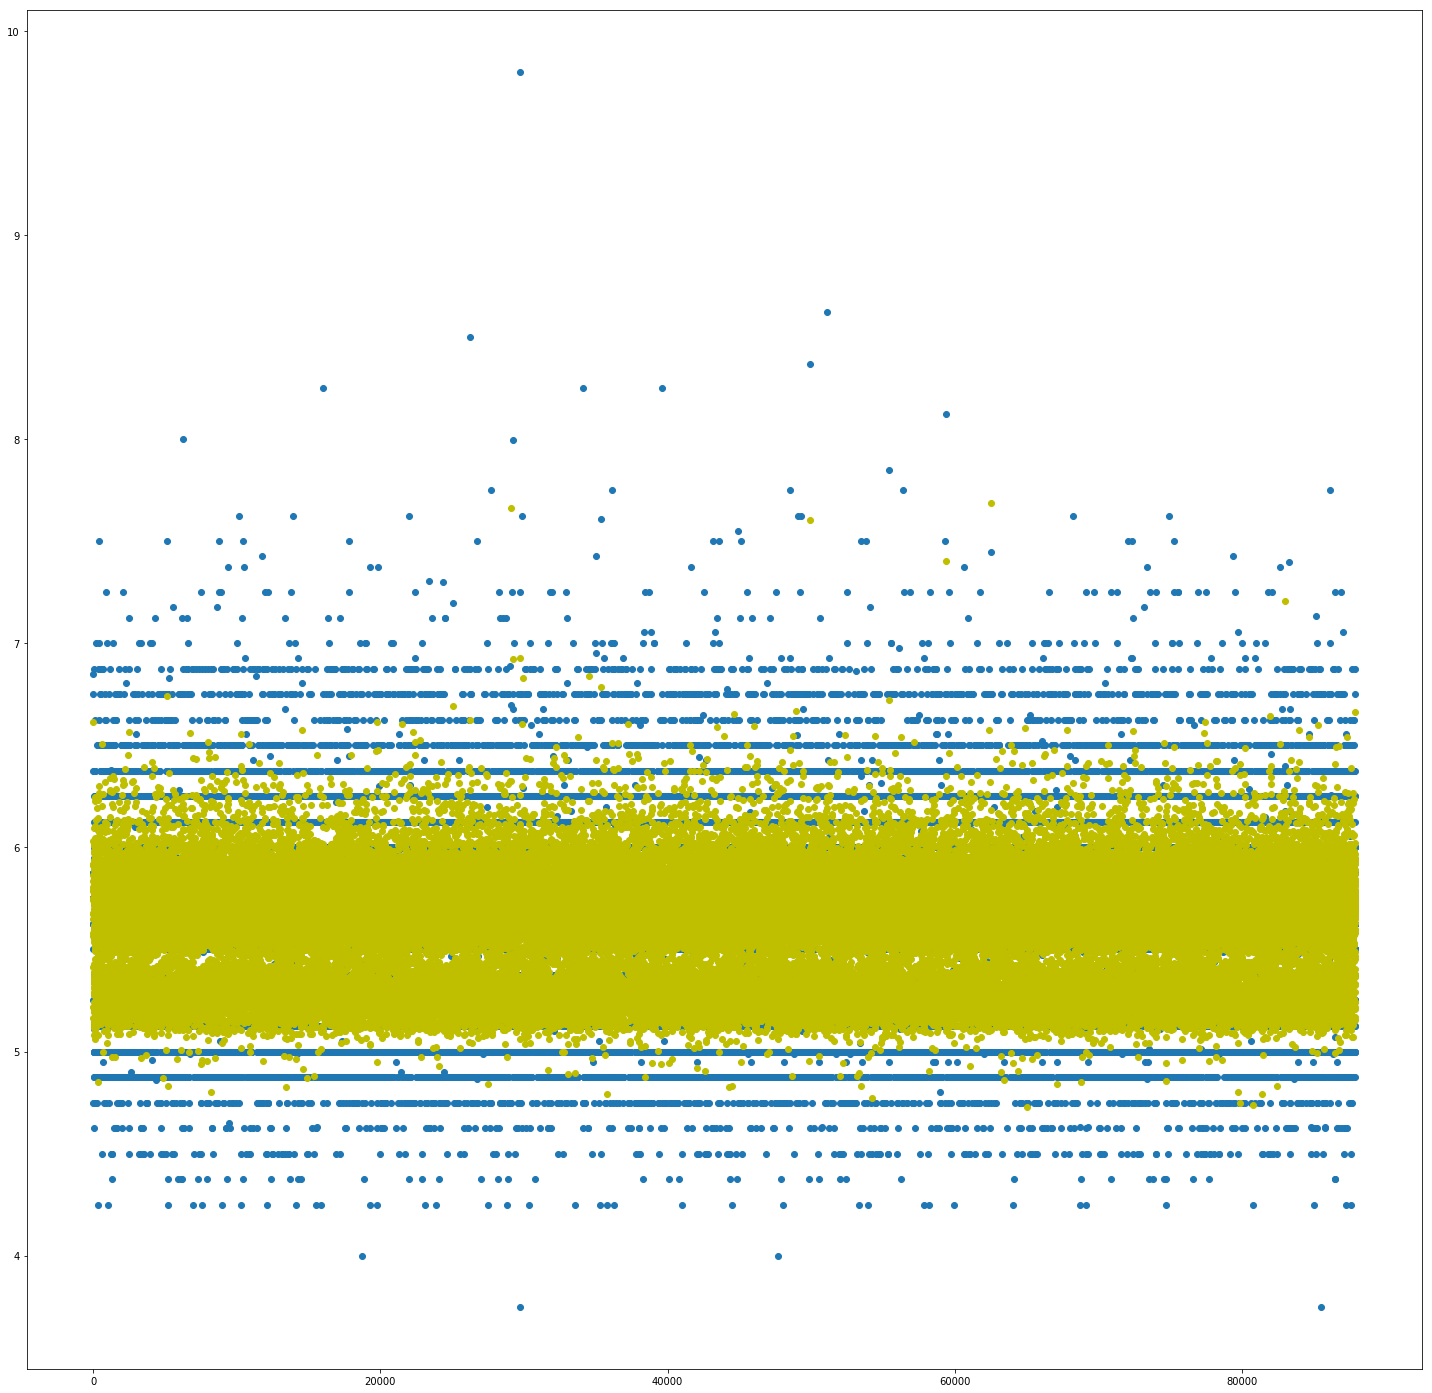

In [54]:
plt.figure(figsize=(25,25))
plt.scatter(range(0,len(test_x)),test_y)
plt.scatter(range(0,len(test_x)),pred_y,color='y')
plt.show()